In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #显示中文宋体
plt.rcParams['axes.unicode_minus']=False #显示负号

d:\anaconda\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
d:\anaconda\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
d:\anaconda\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
d:\anaconda\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
df=pd.read_excel('病理数据.xlsx')

In [3]:
df

,"病理类型(IgA肾病=1,膜性肾病=2，系膜增生=3，局灶节段性=4，微小病变性肾病=5)",Lee分级,体重,收缩压,舒张压,年龄,性别（女=0，男=1）,肉眼血尿（无=0，有=1）,高血压病史,高尿酸血症,...,IgM,IgA,C3,IgA/C3,C4,尿IgG,尿B2,尿NAG酶,胱抑素c,肌酐(Cr)
0,1,1.0,49.0,110,69,33,0,1,0,0,...,1.81,3.45,0.63,5.48,0.07,5.00,0.08,2,0.59,37.2
1,1,2.0,55.0,120,72,23,1,0,0,0,...,0.72,3.75,1.14,3.29,1.91,4.39,0.67,5,0.60,36.8
2,1,2.0,95.0,143,90,31,1,0,1,1,...,0.29,4.73,1.16,4.08,0.26,0.00,0.20,5,0.65,85.0
3,1,3.0,53.2,122,78,26,0,0,0,0,...,0.86,3.20,0.89,3.60,0.18,51.83,0.16,1,0.67,50.7
4,1,3.0,46.0,100,67,27,0,1,0,0,...,1.05,2.58,0.98,2.63,0.26,39.00,0.32,10,0.67,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505,5,NaN,79.5,148,90,45,0,0,1,0,...,0.39,1.25,0.90,1.39,0.23,34.00,0.28,10,1.47,90.0
506,5,NaN,65.0,170,95,70,1,0,1,0,...,0.77,1.76,1.37,1.28,0.38,54.80,12.20,78,2.04,212.0
507,5,NaN,93.9,134,85,27,1,0,1,1,...,1.39,2.42,1.24,1.95,0.20,563.00,0.16,20,3.10,398.0
508,5,NaN,62.0,140,90,28,1,0,0,1,...,1.43,1.59,0.94,1.69,0.25,27.90,0.36,13,3.36,669.0


In [45]:
df['病理类型']=df.iloc[:,0].apply(lambda x: 0 if x==1 else 1)
df.drop(columns=df.columns[0],inplace=True)

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df.iloc[:,1:-1],df.iloc[:,-1],test_size=0.3)
lr = LogisticRegression()
lr.fit(x_train,y_train)
pre_result = lr.predict(x_test)


d:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [47]:
score = lr.score(x_test,y_test)
print(score)#准确率为0.8627


0.8496732026143791


训练模型自变量参数为： [[ 2.22216337e-02 -9.84618686e-03  2.30419733e-03  4.02392437e-02
   9.60071492e-04 -9.22547064e-04  8.45962887e-04  1.22481932e-04
   1.42110369e-02 -1.16218691e-03 -2.95718812e-03 -4.78222636e-02
  -2.28396518e-02  1.29043871e-03  1.27448006e-04  4.24821118e-03
   5.24683240e-03  5.74944482e-04  1.03932587e-03  1.59014300e-04
  -1.26832622e-03  1.56770702e-03  1.79024534e-03 -1.66810734e-03
  -1.02828804e-02  3.92747062e-05 -1.43313487e-02  5.03916717e-04
  -7.92910432e-05 -1.06328587e-02  5.07799449e-04 -1.29207755e-02
  -6.83288720e-06 -3.10393247e-03 -2.67976516e-03  4.75638489e-02
  -4.87966564e-04 -1.68082624e-02]]
训练模型截距为： [-0.00036038]


Text(0.5, 1.0, 'Variances Importances')

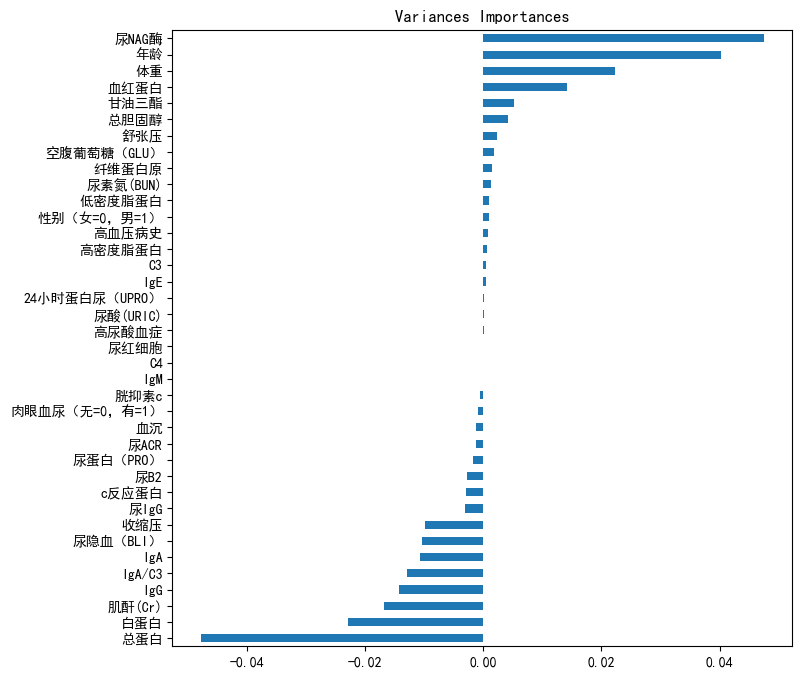

In [48]:

print('训练模型自变量参数为：',lr.coef_)
print('训练模型截距为：',lr.intercept_)
coef_LR = pd.Series(lr.coef_.flatten(),index = x_train.columns,name = 'Var')
plt.figure(figsize=(8,8))
coef_LR.sort_values().plot(kind='barh')
plt.title("Variances Importances")


d:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


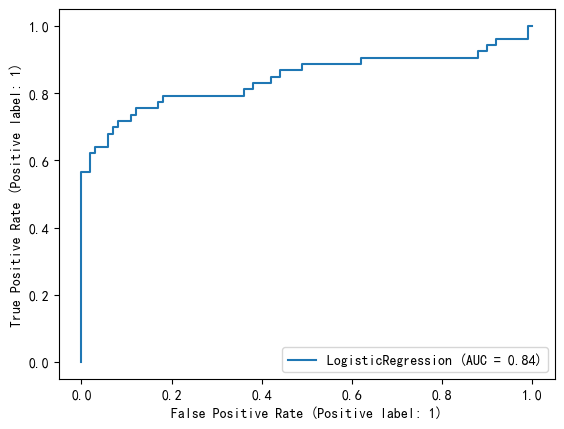

In [49]:
from sklearn import metrics
display = metrics.plot_roc_curve(lr, x_test, y_test)#roc 曲线

In [50]:

from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(x_train,y_train)
pred=clf.predict(x_test)
score=clf.score(x_test,y_test)
score#决策树准确率为0.86928,决策树率高于逻辑回归模型


0.8235294117647058

Text(0.5, 1.0, 'Variances Importances')

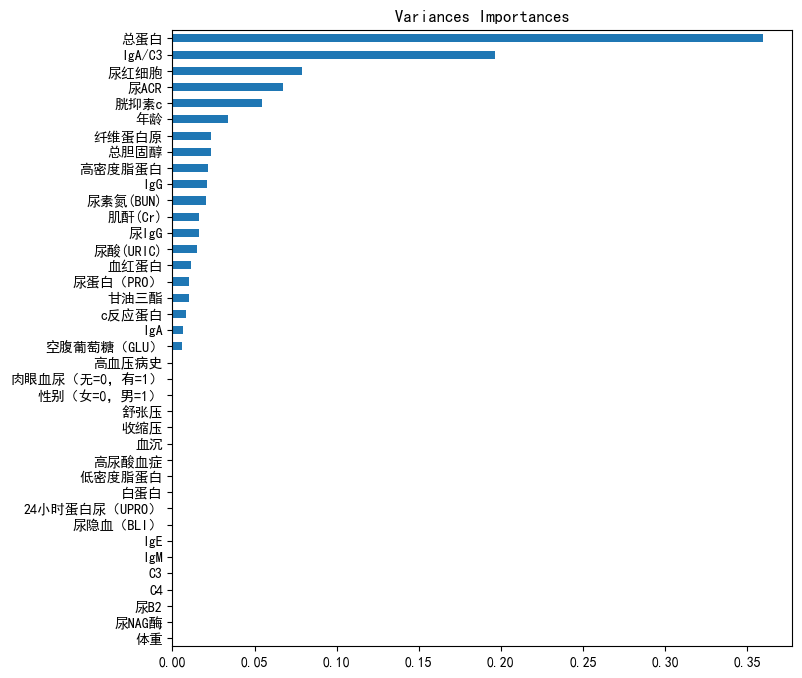

In [51]:
importances=clf.feature_importances_
coef_LR = pd.Series(importances.flatten(),index = x_train.columns,name = 'Var')
plt.figure(figsize=(8,8))
coef_LR.sort_values().plot(kind='barh')
plt.title("Variances Importances")

In [ ]:
clf.fe

d:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


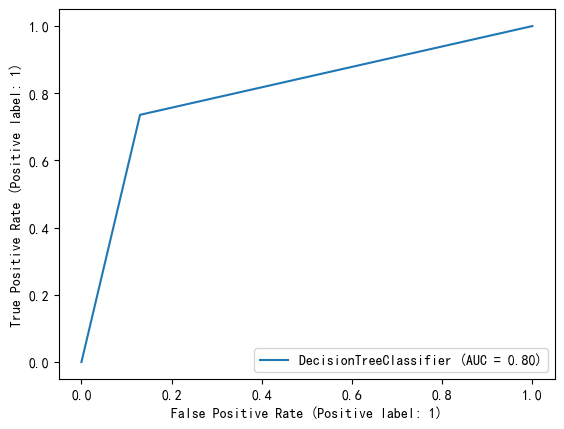

In [52]:
display = metrics.plot_roc_curve(clf, x_test, y_test)#roc 曲线

In [53]:
df.dropna(inplace=True)

In [4]:
df

,"病理类型(IgA肾病=1,膜性肾病=2，系膜增生=3，局灶节段性=4，微小病变性肾病=5)",Lee分级,体重,收缩压,舒张压,年龄,性别（女=0，男=1）,肉眼血尿（无=0，有=1）,高血压病史,高尿酸血症,...,IgM,IgA,C3,IgA/C3,C4,尿IgG,尿B2,尿NAG酶,胱抑素c,肌酐(Cr)
0,1,1.0,49.0,110,69,33,0,1,0,0,...,1.81,3.45,0.63,5.48,0.07,5.00,0.08,2,0.59,37.2
1,1,2.0,55.0,120,72,23,1,0,0,0,...,0.72,3.75,1.14,3.29,1.91,4.39,0.67,5,0.60,36.8
2,1,2.0,95.0,143,90,31,1,0,1,1,...,0.29,4.73,1.16,4.08,0.26,0.00,0.20,5,0.65,85.0
3,1,3.0,53.2,122,78,26,0,0,0,0,...,0.86,3.20,0.89,3.60,0.18,51.83,0.16,1,0.67,50.7
4,1,3.0,46.0,100,67,27,0,1,0,0,...,1.05,2.58,0.98,2.63,0.26,39.00,0.32,10,0.67,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505,5,NaN,79.5,148,90,45,0,0,1,0,...,0.39,1.25,0.90,1.39,0.23,34.00,0.28,10,1.47,90.0
506,5,NaN,65.0,170,95,70,1,0,1,0,...,0.77,1.76,1.37,1.28,0.38,54.80,12.20,78,2.04,212.0
507,5,NaN,93.9,134,85,27,1,0,1,1,...,1.39,2.42,1.24,1.95,0.20,563.00,0.16,20,3.10,398.0
508,5,NaN,62.0,140,90,28,1,0,0,1,...,1.43,1.59,0.94,1.69,0.25,27.90,0.36,13,3.36,669.0


In [54]:
df['lee']=df['Lee分级'].apply(lambda x: 0 if x in[1,2,3] else 1)
df.drop(columns=['Lee分级','病理类型'],inplace=True)

训练模型自变量参数为： [[-0.0359865  -0.0134987   0.01316982 -0.03986115 -0.00220749 -0.00063826
   0.00093252  0.00121128 -0.01552634 -0.00027546  0.00907702 -0.01933266
  -0.01768763  0.00321421  0.00438587  0.00544301 -0.00042396  0.00094767
   0.00267163 -0.00014684  0.01295703  0.00066802 -0.0039886  -0.00194801
  -0.00362927 -0.00056459 -0.00640271 -0.00028098  0.00116476 -0.00418254
   0.00044309 -0.00724978  0.00028609  0.00343505 -0.0030495  -0.01374588
   0.00250658  0.04693459]]
训练模型截距为： [-0.00043751]


d:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Text(0.5, 1.0, 'Variances Importances')

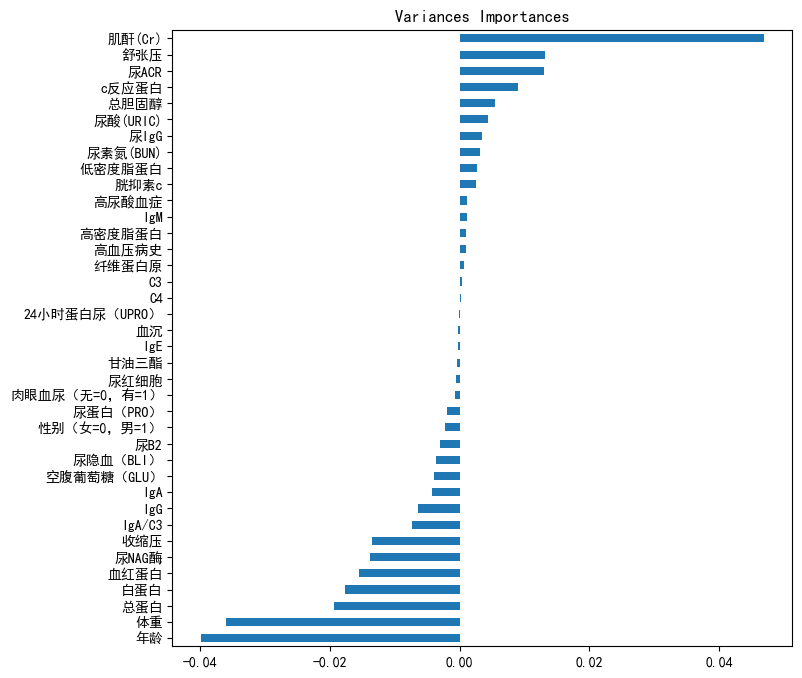

In [55]:
x_train_1,x_test_1,y_train_1,y_test_1 = train_test_split(df.iloc[:,:-1],df.iloc[:,-1],test_size=0.3)
lr1 = LogisticRegression()
lr1.fit(x_train_1,y_train_1)
pre_result_1 = lr1.predict(x_test_1)
print('训练模型自变量参数为：',lr1.coef_)
print('训练模型截距为：',lr1.intercept_)
coef_LR1 = pd.Series(lr1.coef_.flatten(),index = x_train_1.columns,name = 'Var')
plt.figure(figsize=(8,8))
coef_LR1.sort_values().plot(kind='barh')
plt.title("Variances Importances")

In [56]:
score_1= lr1.score(x_test_1,y_test_1)
score_1#准确率为0.84313

0.8431372549019608

d:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


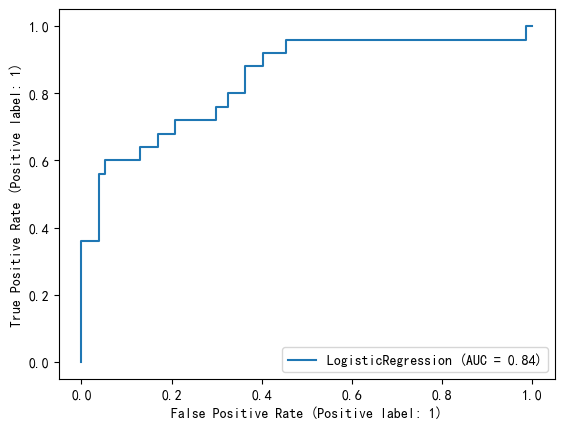

In [57]:
from sklearn import metrics
display = metrics.plot_roc_curve(lr1, x_test_1, y_test_1)

In [58]:
clf1 = tree.DecisionTreeClassifier()
clf1.fit(x_train_1,y_train_1)
pred1=clf.predict(x_test_1)
score1=clf.score(x_test_1,y_test_1)
score_1#准确率为0.8429，两者模型准确度相差不大，几乎一样，但逻辑回归auc大于决策树的auc


0.8431372549019608

Text(0.5, 1.0, 'Variances Importances')

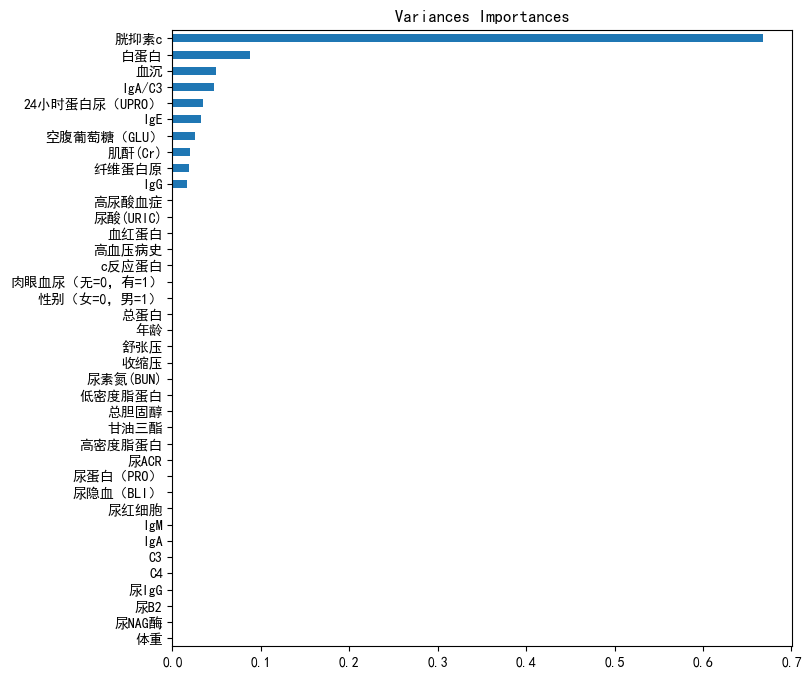

In [59]:
importances=clf1.feature_importances_
coef_LR = pd.Series(importances.flatten(),index = x_train_1.columns,name = 'Var')
plt.figure(figsize=(8,8))
coef_LR.sort_values().plot(kind='barh')
plt.title("Variances Importances")

d:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


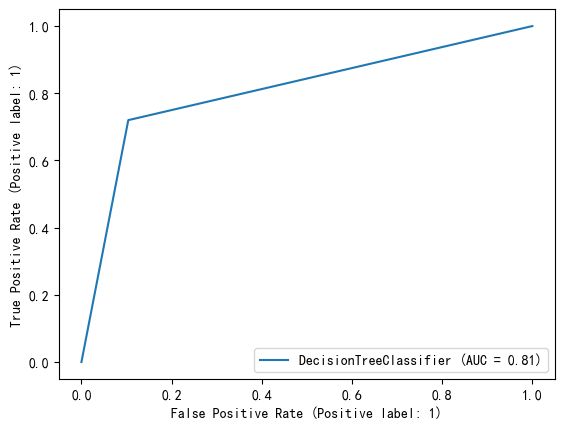

In [60]:
display = metrics.plot_roc_curve(clf1, x_test_1, y_test_1)#roc 曲线